# Dense Auto-Encoders, but first load my stuff.

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard, ModelCheckpoint, Callback, EarlyStopping
from time import time
import glob

Using TensorFlow backend.


# And my data

In [2]:
filelist = glob.glob('ww_plots/224_224_bw/*.npy')
x = np.array([np.array(np.load(fname)) for fname in filelist])

In [3]:
#not forget to normalize
x = x.astype('float')/255.

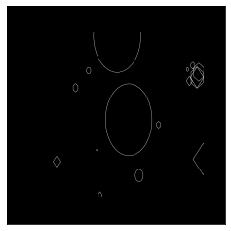

In [4]:
#Check the data
plt.figure(figsize=(20, 4))
ax = plt.subplot(111)
plt.imshow(x[1].reshape(x.shape[1],x.shape[2],3))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
#Split and Shuffle
import random 
random.shuffle(x)

X_train = x[:int(len(x)*0.8)]
X_test = x[int(len(x)*0.8):]

In [6]:
original_dim = X_train.shape[1]*X_train.shape[2]*3

In [7]:
original_dim

150528

In [8]:
#flatten my data
x_train = np.reshape(X_train, [-1, original_dim])
x_test = np.reshape(X_test, [-1, original_dim])

In [9]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(original_dim,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(original_dim, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)


In [10]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)


In [11]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [12]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [13]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 7999 samples, validate on 2000 samples
Epoch 1/50
7999/7999 [==============================] - 9s 1ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 2/50
7999/7999 [==============================] - 9s 1ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 3/50
7999/7999 [==============================] - 9s 1ms/step - loss: 0.6929 - val_loss: 0.6928
Epoch 4/50
7999/7999 [==============================] - 9s 1ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 5/50
7999/7999 [==============================] - 9s 1ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 6/50
7999/7999 [==============================] - 9s 1ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 7/50
7999/7999 [==============================] - 9s 1ms/step - loss: 0.6924 - val_loss: 0.6924
Epoch 8/50
7999/7999 [==============================] - 9s 1ms/step - loss: 0.6923 - val_loss: 0.6922
Epoch 9/50
7999/7999 [==============================] - 9s 1ms/step - loss: 0.6921 - val_loss: 0.6920
Epoch 10/50
7999/7999 [===========

In [15]:
decoded_imgs = autoencoder.predict(x_test)

In [16]:
decoded_imgs.shape

(2000, 150528)

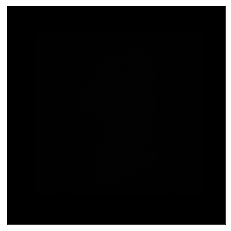

In [18]:
plt.figure(figsize=(20, 4))
ax = plt.subplot(111)
plt.imshow(decoded_imgs[1].reshape(224,224,3))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
decoded_imgs[0]

array([0.00363855, 0.0034631 , 0.00376859, ..., 0.00353269, 0.0037248 ,
       0.00384508], dtype=float32)